<a href="https://colab.research.google.com/github/felipesayegg/Machine-Learning/blob/main/ML_AULA03_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introdução - explicar do problema de custos médicos



## 2. Coleta e Análise de Dados

In [ ]:
import pandas as pd #importando a biblioteca para processamento de dados

In [ ]:
df = pd.read_csv('/content/insurance.csv') #lendo o conjunto de dados

In [ ]:
df.head(10) #visualizando as primeiras 10 linhas do dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.describe() #analise descritiva

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Pré - processamento

In [ ]:
df["smoker"] = df["smoker"].map({"yes":1, "no":0})

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
df["charges"] = df["charges"]/100

## 4. Modelo de ML - KNN

In [ ]:
# validacao hold-out

from sklearn.model_selection import train_test_split

In [ ]:
X = df[["bmi", "smoker"]]
y = df["charges"]

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
## modelo knn - importando a funcao do modelo de KNN

from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#definindo a arquitetura do modelo knn - no caso defini 5 vizinhos mais proximos
knn = KNeighborsRegressor(n_neighbors = 5)

In [ ]:
## Ajustar o modelo KNN

knn.fit(x_treino, y_treino)

KNeighborsRegressor()

## Validação do Modelo KNN

In [ ]:
# importando o erro quadratico medio para avaliar a performance do modelo knn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
## fazendo a previsao dos custos médicos nos dados de teste
y_hat = knn.predict(x_teste)


In [ ]:
y_hat

array([ 64.8336081 , 105.97397002, 227.3456629 ,  83.3385187 ,
       387.4980591 ,  62.70052994,  42.1060069 ,  78.7442308 ,
        43.1198708 ,  86.308388  , 218.22638864,  89.01207028,
        96.29833982, 423.4749951 , 397.0821718 , 429.14977476,
        57.82734274, 435.55122498,  89.9871794 , 227.3456629 ,
        59.7894553 , 109.98511544,  64.4131659 , 102.67217314,
       108.9616655 , 115.81308104,  56.3275858 ,  64.4131659 ,
        75.2967276 ,  74.641816  ,  46.8174712 , 123.07294264,
       110.41137476,  59.9599608 , 100.46350512, 102.67217314,
       100.3740992 ,  79.4659428 , 224.25513424, 414.0811576 ,
        67.5513143 , 110.88347614,  74.6762228 , 112.88310646,
        99.43938844,  86.1952729 , 115.11752256, 112.1309438 ,
       415.7877428 ,  87.9628754 ,  78.0978563 ,  43.7842128 ,
        98.3653672 ,  54.3844498 ,  36.6649608 ,  74.5154612 ,
       112.88310646, 442.15852314,  77.1550816 ,  68.2130558 ,
       108.83391004,  75.0149722 , 106.73058606, 152.30

In [ ]:
# calculando o erro quadratico médio do knn para k=5
eqm = mean_squared_error(y_teste, y_hat)
print(eqm)

4596.324879754863


In [ ]:
# calculando o erro absoluto medio do knn para k = 5

mae = mean_absolute_error(y_teste, y_hat)
print(mae)

48.76409210391044


Comparando o modelo de Regressão Linear com o modelo de KNN, temos que no modelo de Regressão Linear o  Erro Quadrático Médio foi 5603.86 e Erro Absoluto Médio foi 57.38.

No modelo de KNN temos um EQM de 4596 e MAE de 48. Portanto, o KNN teve melhores resultados.



## Testando para outros valores de k-vizinhos mais proximos

In [ ]:
knn10 = KNeighborsRegressor(n_neighbors = 10)

In [ ]:
knn10.fit(x_treino, y_treino)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_hat10 = knn10.predict(x_teste)

In [ ]:
eqm10 = mean_squared_error(y_teste, y_hat10)
print(eqm10)

4946.050740502672


In [ ]:
knn15 = KNeighborsRegressor(n_neighbors = 15)
knn15.fit(x_treino, y_treino)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
y_hat15 = knn15.predict(x_teste)

In [ ]:
eqm15 = mean_squared_error(y_teste, y_hat15)
print(eqm15)

5598.597507303726


In [ ]:
## Encontrando o melhor k para o knn
# Testar diferentes valores de k
k_values = range(1, 31)  # Testar k de 1 até 30
eqm_score = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_treino, y_treino)
    y_pred = knn.predict(x_teste)
    eqm = mean_squared_error(y_teste, y_pred)
    eqm_score.append(eqm)


In [ ]:
eqm_score

[6779.70597365758,
 5471.978779486141,
 5189.607014878519,
 4713.953125970907,
 4596.324879754863,
 4716.409233831645,
 4784.038416603888,
 4955.7112419326,
 4876.018389864199,
 4946.050740502672,
 5054.114839597452,
 5151.261665590633,
 5231.427941803773,
 5408.844614278969,
 5598.597507303726,
 5700.137374318721,
 5783.789421435056,
 5944.11786761338,
 6039.999209206464,
 6166.778426467284,
 6208.2492848382,
 6240.922692550451,
 6268.271341616922,
 6447.697892822777,
 6518.4682773825925,
 6610.53179027821,
 6692.0830641156135,
 6791.139401673736,
 6923.455261075441,
 7016.666672801446]

In [ ]:
import matplotlib.pyplot as plt #biblioteca para criar gráficos

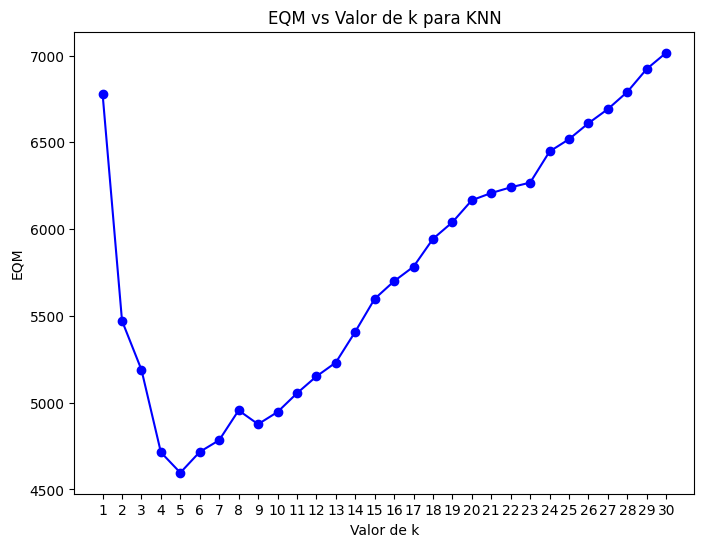

In [ ]:
# Plotar o gráfico da acurácia em função de k
plt.figure(figsize = (8, 6)) #definindo o tamanho da figura
plt.plot(k_values, eqm_score, marker='o', linestyle='-', color='b') #definindo o eixo x e eixo e estilo de linha
plt.xlabel('Valor de k') #titulo do eixo x
plt.ylabel('EQM') # titulo do eixo y
plt.title('EQM vs Valor de k para KNN') # titulo do gráficos
plt.xticks(k_values)
plt.grid(False) # grade do fundo
plt.show()

In [ ]:
## Encontrando o melhor k para o knn
# Testar diferentes valores de k
k_values = range(1, 100)  # Testar k de 1 até 30
mae_escore = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_treino, y_treino)
    y_pred = knn.predict(x_teste)
    mae = mean_absolute_error(y_teste, y_pred)
    mae_escore.append(mae)


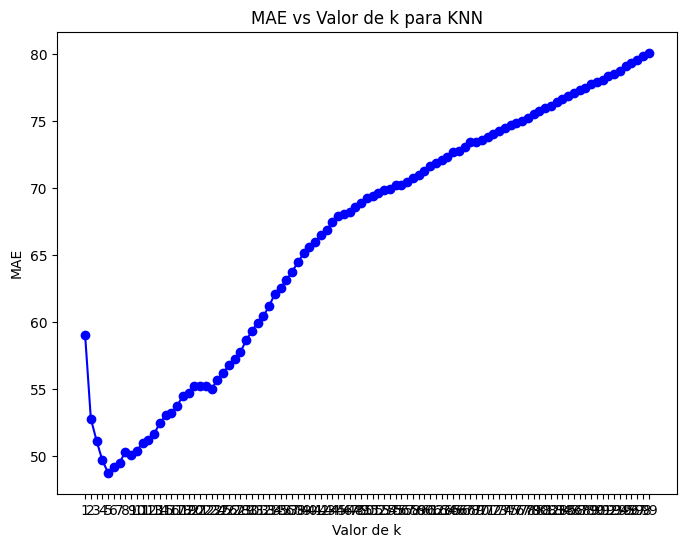

In [ ]:
# Plotar o gráfico da acurácia em função de k
plt.figure(figsize = (8, 6)) #definindo o tamanho da figura
plt.plot(k_values, mae_escore, marker='o', linestyle='-', color='b') #definindo o eixo x e eixo e estilo de linha
plt.xlabel('Valor de k') #titulo do eixo x
plt.ylabel('MAE') # titulo do eixo y
plt.title('MAE vs Valor de k para KNN') # titulo do gráficos
plt.xticks(k_values)
plt.grid(False) # grade do fundo
plt.show()

O k=5 é o melhor k para o KNN, pois retornou o menores EQM e MAE entre todos os testados.